<a href="https://colab.research.google.com/github/SaniaNandi22/ENCRYPTIX/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_model = df.drop(['PassengerId', 'Name','SibSp','Parch', 'Ticket', 'Cabin'], axis=1)

In [9]:
df_model['Age'].fillna(df_model['Age'].median(), inplace=True)
df_model['Embarked'].fillna(df_model['Embarked'].mode()[0], inplace=True)


<ipython-input-9-16c84c11fdb3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Age'].fillna(df_model['Age'].median(), inplace=True)
<ipython-input-9-16c84c11fdb3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [10]:
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [11]:
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.7877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



<ipython-input-18-97bb969a8562>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x='Survived', palette='Set2')


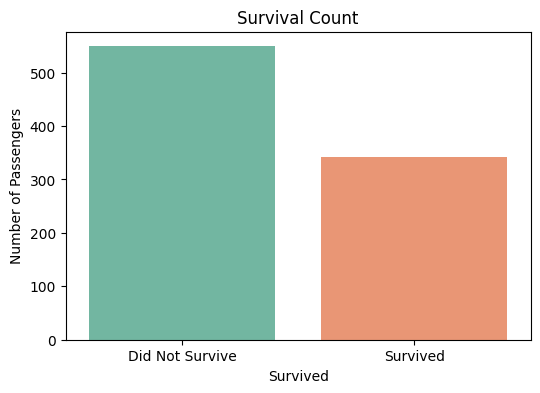

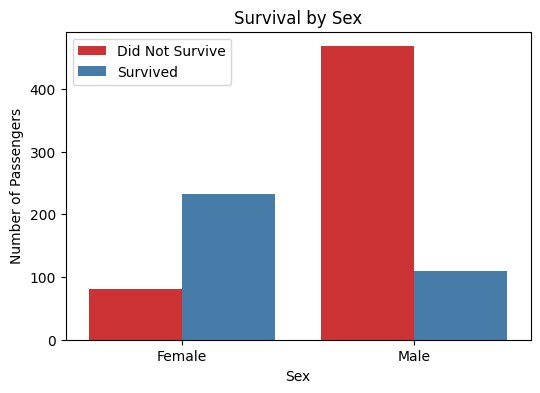

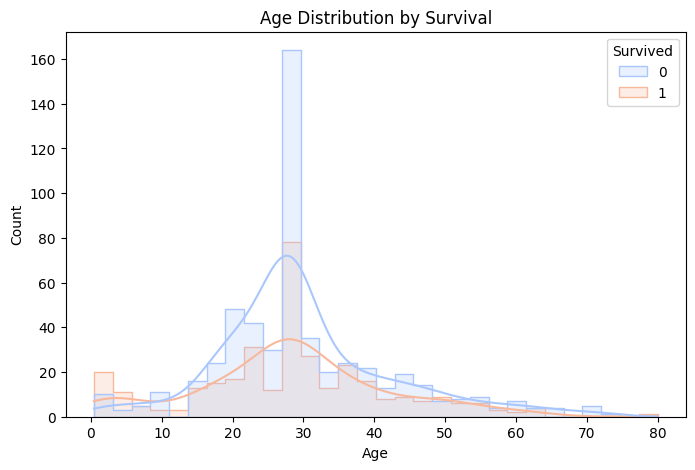

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_model, x='Survived', palette='Set2')
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.show()

# Survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df_model, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

# Age distribution by survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df_model, x='Age', hue='Survived', bins=30, kde=True, palette='coolwarm', element='step')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()